In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


%matplotlib inline  

In [28]:
df = pd.read_excel('/Users/zosia/Desktop/dane_prom/fully_merged_data.xlsx')

In [29]:
## Find ID of strange data (smoker with 0 years of smoking)

In [30]:
all_stats = pd.read_excel('/Users/zosia/Desktop/dane_prom/all_stats_eng.xlsx')

In [31]:
strange = all_stats.loc[(all_stats['group'] == 'non') | all_stats['YearsOfSmoking'] == 0]

In [32]:
strange_id = strange.Variables.str.extract('(\d+)')
strange_id = strange_id[0].tolist()

In [101]:
#data= df.iloc[:,[0,40]]
#data = df[list(df.columns[0:1]) + list(df.columns[40:])]
data = df
np.shape(data)

(501, 637)

In [102]:
drop_id = [130, 361, 379, 382, 455, 508, 517, 566, 643, 801, 834, 854, 927, 513] # + strange_id

In [103]:
print( drop_id)

[130, 361, 379, 382, 455, 508, 517, 566, 643, 801, 834, 854, 927, 513]


In [104]:
data = data[~data.id.isin(drop_id)]

In [105]:
np.shape(data)

(487, 637)

In [106]:
data

,id,L Cortex White Surface Total Area,L Cortex Mean Thickness,L Brain Segmentation Volume,L Brain Segmentation Volume Without Ventricles,L Brain Segmentation Volume Without Ventricles from Surf,R Cortex White Surface Total Area,R Cortex Mean Thickness,R Brain Segmentation Volume,R Brain Segmentation Volume Without Ventricles,...,normRange3,BrainStem_index,BrainStem_SegId,BrainStem_Nvoxels,BrainStem_volume_mm3,normMean4,normStdDev3,normMin3,normMax3,normRange2
0,0,91559.1,2.66137,1266925,1248772,1.248798e+06,92652.3,2.67640,1266925,1248772,...,78,11,16,22857,22904.9,77.7730,9.7718,13,113,100
1,10,87801.8,2.59872,1191311,1177870,1.177810e+06,87335.4,2.62856,1191311,1177870,...,78,11,16,18257,18139.2,82.3428,9.6367,19,113,94
2,1000,84704.4,2.63064,1129977,1116423,1.116157e+06,85373.0,2.62956,1129977,1116423,...,69,11,16,19200,19226.5,82.9126,9.6400,18,111,93
3,1001,100968.0,2.63486,1362391,1345462,1.345388e+06,101887.0,2.59180,1362391,1345462,...,76,11,16,21958,21924.0,82.6825,9.1148,21,115,94
4,103,79255.4,2.67144,1059360,1046824,1.046769e+06,78432.2,2.66245,1059360,1046824,...,64,11,16,18079,17879.4,80.9856,9.8699,21,112,91
5,12,79338.6,2.56434,1176364,1161059,1.160913e+06,80724.6,2.57059,1176364,1161059,...,82,11,16,22930,22734.0,84.5854,9.2122,20,118,98
6,128,78525.1,2.68181,1071264,1054853,1.055068e+06,78855.4,2.66719,1071264,1054853,...,67,11,16,17410,17277.2,85.8374,9.7606,24,118,94
7,13,87890.2,2.59890,1140328,1129039,1.129032e+06,87944.7,2.61157,1140328,1129039,...,90,11,16,18974,18929.3,82.2677,9.9673,5,121,116
9,131,94714.7,2.54105,1247199,1229357,1.229742e+06,95115.3,2.51661,1247199,1229357,...,92,11,16,24174,24133.4,80.6521,9.4648,17,111,94
10,132,98049.4,2.65850,1409536,1339095,1.338803e+06,99493.8,2.65336,1409536,1339095,...,75,11,16,23817,23681.6,79.6083,10.1321,14,116,102


In [107]:
np.shape(data)

(487, 637)

In [108]:
list(data)

['id',
 ' L Cortex White Surface Total Area',
 ' L Cortex Mean Thickness',
 ' L Brain Segmentation Volume',
 ' L Brain Segmentation Volume Without Ventricles',
 'L  Brain Segmentation Volume Without Ventricles from Surf',
 ' R Cortex White Surface Total Area',
 ' R Cortex Mean Thickness',
 'R  Brain Segmentation Volume',
 'R Brain Segmentation Volume Without Ventricles',
 ' R Brain Segmentation Volume Without Ventricles from Surf',
 'l_caudalanteriorcingulate_SurfArea',
 'l_caudalanteriorcingulate_GrayVol',
 'l_caudalanteriorcingulate_ThickAvg',
 'l_caudalanteriorcingulate_ThickStd',
 'l_caudalanteriorcingulate_MeanCurv',
 'l_caudalmiddlefrontal_SurfArea',
 'l_caudalmiddlefrontal_GrayVol',
 'l_caudalmiddlefrontal_ThickAvg',
 'l_caudalmiddlefrontal_ThickStd',
 'l_caudalmiddlefrontal_MeanCurv',
 'l_cuneus_SurfArea',
 'l_cuneus_GrayVol',
 'l_cuneus_ThickAvg',
 'l_cuneus_ThickStd',
 'l_cuneus_MeanCurv',
 'l_entorhinal_SurfArea',
 'l_entorhinal_GrayVol',
 'l_entorhinal_ThickAvg',
 'l_entorh

In [109]:
data=data.replace({'grupa': {'smoker': 1, 'non-smoker': 0}})
#data=data[0:2]

In [110]:
data = data.drop(['recon_all2', 'recon_all222', 'recon_all2222', 'recon_all22222', 'recon_all3'], axis=1)
data = data.drop(['id', 'recon_all', 'r_insula_MeanCurv', 'r_temporalpole_MeanCurv','r_temporalpole_GrayVol', 'r_insula_GrayVol', 'r_insula_ThickAvg', 'r_temporalpole_ThickAvg'], axis=1)

In [111]:
data_mm3 = data.filter(regex='mm3', axis=1)
data_vol = data.filter(regex='_GrayVol', axis=1)
data_thick = data.filter(regex='_ThickAvg', axis=1)
data_curv = data.filter(regex='_MeanCurv', axis=1)
#data_surfa = data.filter(regex='SurfArea', axis=1)
data_left_right_overall = data[data.columns[0:10]]
grupa = data[['grupa']]
sex = data[['sex']]

data = pd.concat([grupa, sex, data_mm3, data_vol, data_thick, data_left_right_overall, data_curv], axis=1, join_axes=[data_mm3.index])

In [112]:
np.shape(data)

(487, 319)

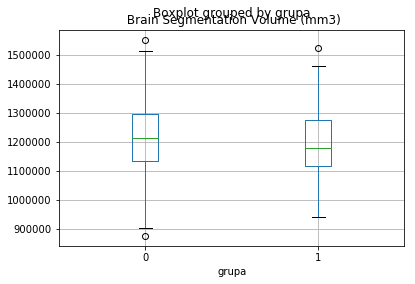

In [113]:
brain_vol=data.boxplot(column=' Brain Segmentation Volume (mm3)',by='grupa')

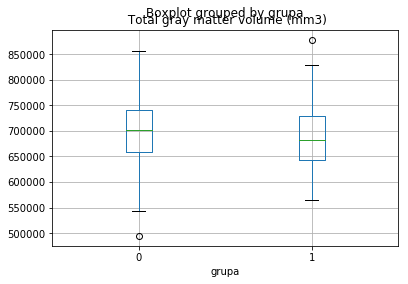

In [114]:
grey_vol=data.boxplot(column=' Total gray matter volume (mm3)',by='grupa')

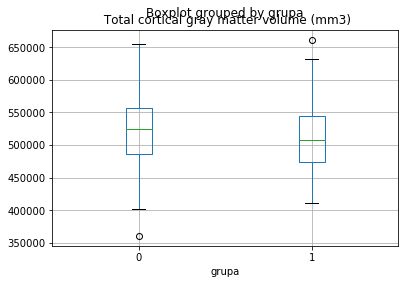

In [115]:
grey_cortical_vol=data.boxplot(column=' Total cortical gray matter volume (mm3)', by = 'grupa')

# Confounding Factor Analysis
TODO : fill it in



# Feature Selection 

Monitored the stability of the selection algorithm with the Jaccard index.
Computed the feature selection frequency across all CV iterations. 

### Normalization (standardization)

In [116]:
list(data)

['grupa',
 'sex',
 ' Brain Segmentation Volume (mm3)',
 ' Brain Segmentation Volume Without Ventricles (mm3)',
 ' Brain Segmentation Volume Without Ventricles from Surf (mm3)',
 ' Volume of ventricles and choroid plexus (mm3)',
 ' Left hemisphere cortical gray matter volume (mm3)',
 ' Right hemisphere cortical gray matter volume (mm3)',
 ' Total cortical gray matter volume (mm3)',
 ' Left hemisphere cerebral white matter volume (mm3)',
 ' Right hemisphere cerebral white matter volume (mm3)',
 ' Total cerebral white matter volume (mm3)',
 ' Subcortical gray matter volume (mm3)',
 ' Total gray matter volume (mm3)',
 ' Supratentorial volume (mm3)',
 ' Supratentorial volume (mm3)2',
 ' Supratentorial volume voxel count (mm3)',
 ' Mask Volume (mm3)',
 ' Estimated Total Intracranial Volume (mm3)',
 'lh_Thalamus_volume_mm3',
 'rh_Thalamus_volume_mm3',
 'lh_Caudate_volume_mm366',
 'rh_Caudate_volume_mm315',
 'lh_Putamen_volume_mm3666',
 'rh_Putamen_volume_mm31515',
 'lh_Pallidum_volume_mm3',
 

In [117]:
# Normalizing volume as a proportion to total volume

#volume = data.filter(regex='_mm3', axis=1)
#data[list(volume)].div(data[' Brain Segmentation Volume (mm3)'], axis=0)

#gray_volume = data.filter(regex='_GrayVol', axis=1)
#data[list(gray_volume)].div(data[' Total cortical gray matter volume (mm3)'], axis=0)

#data['Brain_White_Surface_Total_Area'] = data[' R Cortex White Surface Total Area'] + data[' L Cortex White Surface Total Area']
#surface_area = data.filter(regex='_SurfArea', axis=1)
#data[list(surface_area)].div(data['Brain_White_Surface_Total_Area'], axis=0)

In [118]:
## Divide on two dataframes
data_woman = data.loc[data['sex'] == "k"]
data_woman = data_woman.drop("sex", axis =1)
data_man = data.loc[data['sex'] == "m"]
data_man = data_man.drop("sex", axis =1)


In [119]:
data_woman.columns[data_woman.isna().any()].tolist()

[]

In [120]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#X0 = min_max_scaler.fit_transform(X0)

# Normalizing volume as a proportion to total volume


# Normalization column-wise
data_man_norm = pd.DataFrame(min_max_scaler.fit_transform(data_man), columns=data_man.columns)
data_woman_norm = pd.DataFrame(min_max_scaler.fit_transform(data_woman), columns=data_woman.columns)



In [121]:
# Normalizing volume as a proportion to total volume

In [122]:
data_norm = pd.concat([data_man_norm, data_woman_norm], axis=0, ignore_index=True)
data_norm

,grupa,Brain Segmentation Volume (mm3),Brain Segmentation Volume Without Ventricles (mm3),Brain Segmentation Volume Without Ventricles from Surf (mm3),Volume of ventricles and choroid plexus (mm3),Left hemisphere cortical gray matter volume (mm3),Right hemisphere cortical gray matter volume (mm3),Total cortical gray matter volume (mm3),Left hemisphere cerebral white matter volume (mm3),Right hemisphere cerebral white matter volume (mm3),...,precentral_MeanCurv,precuneus_MeanCurv,rostralanteriorcingulate_MeanCurv,rostralmiddlefrontal_MeanCurv,superiorfrontal_MeanCurv,superiorparietal_MeanCurv,superiortemporal_MeanCurv,supramarginal_MeanCurv,transversetemporal_MeanCurv,insula_MeanCurv
0,1.0,0.463805,0.488626,0.488499,0.157404,0.476402,0.527163,0.501918,0.414785,0.429921,...,0.600000,0.348837,0.285714,0.466667,0.520000,0.500000,0.593750,0.433333,0.444444,0.486486
1,1.0,0.206720,0.221362,0.220788,0.077157,0.306684,0.332607,0.319715,0.125858,0.143900,...,0.422222,0.627907,0.571429,0.733333,0.520000,0.531250,0.656250,0.333333,0.583333,0.675676
2,1.0,0.643018,0.683881,0.683447,0.125859,0.670820,0.660590,0.665677,0.625366,0.653354,...,0.355556,0.558140,0.346939,0.566667,0.600000,0.468750,0.562500,0.600000,0.583333,0.135135
3,0.0,0.426774,0.449419,0.450038,0.155663,0.417224,0.425398,0.421333,0.420568,0.439521,...,0.600000,0.348837,0.551020,0.700000,0.600000,0.468750,0.625000,0.733333,0.180556,0.297297
4,0.0,0.731520,0.671023,0.670157,1.000000,0.637431,0.689993,0.663852,0.463758,0.527107,...,0.422222,0.488372,0.510204,0.233333,0.200000,0.406250,0.468750,0.333333,0.680556,0.378378
5,1.0,0.473124,0.494444,0.494248,0.193247,0.562698,0.555296,0.558977,0.395379,0.392783,...,0.377778,0.372093,0.265306,0.400000,0.160000,0.187500,0.625000,0.433333,0.250000,0.405405
6,0.0,0.550074,0.583299,0.582700,0.138150,0.565423,0.547309,0.556317,0.519203,0.549278,...,0.266667,0.441860,0.285714,0.366667,0.280000,0.281250,0.406250,0.566667,0.597222,0.243243
7,0.0,0.645897,0.674545,0.675712,0.212145,0.716551,0.700477,0.708471,0.561102,0.591807,...,0.444444,0.488372,0.530612,0.333333,0.240000,0.593750,0.312500,0.266667,0.541667,0.648649
8,1.0,0.155235,0.153530,0.153277,0.183016,0.078066,0.106095,0.092156,0.181835,0.186692,...,0.311111,0.348837,0.469388,0.600000,0.320000,0.500000,0.625000,0.266667,0.000000,0.621622
9,0.0,0.445988,0.480700,0.481209,0.055114,0.507737,0.483545,0.495576,0.441586,0.457009,...,0.555556,0.604651,0.102041,0.433333,0.320000,0.468750,0.593750,0.400000,0.583333,0.351351


In [123]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data_shuffled0 = shuffle(data_norm, random_state=7)
data_shuffled0 = data_shuffled0.reset_index(drop=True)
y0 = data_shuffled0.grupa
X0 = data_shuffled0.drop(['grupa'], axis=1)

## t-test for feature selection

In [124]:
from scipy.stats import ttest_ind

smoker = data_shuffled0[data_shuffled0['grupa']== 1]
nsmoker = data_shuffled0[data_shuffled0['grupa']== 0]

In [125]:
len(smoker), len(nsmoker)

(183, 304)

In [126]:
t_stats=[]
p_value=[]
for i in list(data_shuffled0)[3:250]:
    #print(i)
    #print(ttest_ind(smoker[i], nsmoker[i]))
    test=ttest_ind(smoker[i], nsmoker[i])
    t_stats.append(test[0])
    p_value.append(test[1])

In [127]:
# data frame with variables and scores, sorted
t_test = pd.DataFrame({'variable': list(data_shuffled0)[3:250], 't_statistic': t_stats, 'p_value':p_value})
t_test = t_test.sort_values(by=['p_value'])

In [128]:
t_test_list= t_test['variable'][1:15].tolist()

In [159]:

def feature_selector(X0, x_val, y0, y_val, test_method, classifier_method, test_size=0.2, num_iters=1000):
    """Function that will plot how adding next features influence classifier score
    :param test_method: given order of features
    :param classifier_method: classifier"""
    
    scores_big_array = []
    for n_iters in range(0, num_iters):
        #X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=test_size)#, random_state=1)

        scores = []
        for i in range(1, len(test_method)):
            classifier_method.fit(X0[test_method[0:i]['variable']], y)
            score = classifier_method.score(x_val[test_method[0:i]['variable']], y_val)
            scores.append(score)
        scores_big_array.append(scores)
    scores_big_array_np = np.array(scores_big_array)
    
    # plot mean values
    plt.plot(range(1, 223), scores_big_array_np.mean(axis=0), color="black")
    plt.title("Accuracy of LogReg with t-test feature selection")
    plt.xlabel("Number Of variables")
    plt.ylabel("Accuracy Score")
    print("Mean accuracy values for different number of features ={}".format(scores_big_array_np.mean(axis=0)))
    return scores_big_array_np
    

In [160]:


# Returns vector of acc results with increasing number of features
logreg = LogisticRegression(solver = 'lbfgs')

# Get accuracy of feature selection for logreg and t_test
scores_big_array_np = feature_selector(X0, y0, t_test, logreg, test_size=0.2, num_iters=100)

TypeError: feature_selector() missing 2 required positional arguments: 'test_method' and 'classifier_method'

In [ ]:
scores_big_array_np.shape


## information gain

In [131]:
from sklearn.feature_selection import mutual_info_classif

feature_scores = mutual_info_classif(X0, y0)

# data frame with variables and scores, sorted
inf_gain= pd.DataFrame({'variable': list(X0), 'score': -np.sort(-feature_scores)})

inf_gain_list = inf_gain['variable'][1:15].tolist()

list(set(t_test_list) & set(inf_gain_list))

[' Total cortical gray matter volume (mm3)',
 ' Left hemisphere cortical gray matter volume (mm3)',
 ' Total gray matter volume (mm3)',
 ' Right hemisphere cortical gray matter volume (mm3)']

In [ ]:
# Get accuracy of feature selection for logreg and information gain
scores_big_array_np = feature_selector(X0, y0, inf_gain, logreg, test_size=0.2, num_iters=50)

## random forest feature importance

In [132]:

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=100,
                              random_state=0)

model = forest.fit(X0, y0)
importances = model.feature_importances_

# data frame with variables and scores, sorted
rf_imp = pd.DataFrame({'variable': list(X0), 'score': -np.sort(-importances)})

In [133]:
rf_imp_list = rf_imp['variable'][1:15].tolist()

In [ ]:
list(set(rf_imp_list) & set(t_test_list) & set(inf_gain_list))

In [ ]:
# Get accuracy of feature selection for logreg and random forest feature importance
scores_big_array_np = feature_selector(X0, y0, rf_imp, logreg, test_size=0.2, num_iters=50)

In [ ]:
# Get accuracy of feature selection for random forest and random forest feature importance
#scores_big_array_np = feature_selector(X0, y0, rf_imp, forest, test_size=0.2, num_iters=20)

In [ ]:
# Get accuracy of feature selection for random forest and information gain importance
scores_big_array_np = feature_selector(X0, y0, inf_gain, forest, test_size=0.2, num_iters=20)

# PCA


In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X0)

pca.explained_variance_ratio_

In [ ]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X0)
X_back = kpca.inverse_transform(X_kpca)

In [ ]:
kpca_sig=KernelPCA(kernel="sigmoid", fit_inverse_transform=True, gamma=10)

In [ ]:
kpca_poly=KernelPCA(kernel="poly", degree = 3, fit_inverse_transform=True, gamma=10)

In [ ]:
def Kernel_Pca(ker):
    kpca = KernelPCA(n_components=4, kernel=ker, gamma=15)
    x_kpca = kpca.fit_transform(X0)
    kpca_transform = kpca.fit_transform(X0)
    explained_variance = np.var(kpca_transform, axis=0)
    ev = explained_variance / np.sum(explained_variance)

    #--------- Bar Graph for Explained Variance Ratio ------------
    plt.bar([1,2,3,4],list(ev*100),label='Principal Components',color='b')
    plt.legend()
    plt.xlabel('Principal Components ')
    #----------------------
    n=list(ev*100)
    pc=[]
    for i in range(len(n)):
            n[i]=round(n[i],4)
            pc.append('PC-'+str(i+1)+'('+str(n[i])+')')

    #----------------------
    plt.xticks([1,2,3,4],pc, fontsize=7, rotation=30)
    plt.ylabel('Variance Ratio')
    plt.title('Variance Ratio of MRI data using kernel:'+str(ker))
    plt.show()
    #---------------------------------------------------
    # *Since the initial 2 principal components have high variance.
    #   so, we select pc-1 and pc-2.
    #---------------------------------------------------
    kpca = KernelPCA(n_components=2, kernel=ker, gamma=15)
    x_kpca = kpca.fit_transform(X0)
    principalComponents = kpca.fit_transform(X0)
#QWQdeeqREdqarde
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC-1', 'PC-2'])
    # Adding lables
    finalDf = pd.concat([principalDf, data_shuffled0[['grupa']]], axis = 1)
    # Plotting pc1 & pc2
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC-1', fontsize = 15)
    ax.set_ylabel('PC-2', fontsize = 15)
    ax.set_title('KPCA on MRI data using kernel:'+str(ker), fontsize = 20)
    targets = [1, 0]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['grupa'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
                   , finalDf.loc[indicesToKeep, 'PC-2']
                   , c = color
                   , s = 30)
    ax.legend(targets)
    ax.grid()
    plt.show() # FOR SHOWING THE PLOT
    #------------------- SAVING DATA INTO CSV FILE ------------
    #finalDf.to_csv('iris_after_KPCA_using_'+str(ker)+'.csv')


#------------------------------------------------------
k=['linear','rbf','poly','sigmoid' ]
for i in k:
    Kernel_Pca(i)

# Redefine data to select features

In [ ]:
#Right hemisphere cortical gray matter volume (mm3)
#Total cortical gray matter volume (mm3)
#Mask Volume (mm3)
#Left hemisphere cortical gray matter volume (mm3)
#Total gray matter volume (mm3)
#Supratentorial volume (mm3)
# Brain Segmentation Volume Without Ventricles (mm3)
# Estimated Total Intracranial Volume (mm3)
                                             
data_red= data_norm
#data_red = data[['grupa', ' Right hemisphere cortical gray matter volume (mm3)', ' Total cortical gray matter volume (mm3)', ' Mask Volume (mm3)', ' Left hemisphere cortical gray matter volume (mm3)', ' Total gray matter volume (mm3)', ' Supratentorial volume (mm3)', ' Brain Segmentation Volume Without Ventricles (mm3)', ' Estimated Total Intracranial Volume (mm3)']]                                             

# K-fold Classifier model run

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature

def run_k_fold(classifier, X, y, k = 10):
    kf = KFold (n_splits = k,random_state=7)
    kf.get_n_splits(X)
    
    accuracy_set=[]
    roc_score_set=[]
    #precision_set =[]
    yscore_np = -np.ones(shape=y.shape)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(X_train, y_train)

        #predictions = rfc.predict(X_test)
        score = classifier.score(X_test, y_test)
        accuracy_set.append(score)
        
        if classifier == svmc:
            print(classifier.decision_function(X_test))
            yscore_np[test_index] = classifier.decision_function(X_test)
        else:
            #print(classifier.predict_proba(X_test))
            yscore_np[test_index] = classifier.predict_proba(X_test)[:,0]
        #precision, recall, _ = precision_recall_curve(y_test, y_score)

        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, classifier.predict(X_test))
        #print (auc(false_positive_rate, true_positive_rate))
        rscore = auc(false_positive_rate, true_positive_rate)
        roc_score_set.append(rscore)

    #print (roc_auc_score(y, rfc.predict(X)))
    average_precision = average_precision_score(y, yscore_np)

    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    
    precision, recall, _ = precision_recall_curve(y, yscore_np)
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    
    
    avg_acc = sum(accuracy_set)/len(accuracy_set)
    avg_auc = sum(roc_score_set)/len(roc_score_set)
    print ("Average accuracy score score %f" % avg_acc)
    print ("Average ROC AUC score %f" % avg_auc)
    return avg_acc, avg_auc, average_precision

# LOOCV model run

In [ ]:
def run_loocv(classifier):
    loo = LeaveOneOut()
    tot_acc=[]
    for train_index, test_index in loo.split(X):
            #print("train:", train_index, "validation:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            classifier.fit(X_train, y_train)

            score = logreg.score(X_test, y_test)
            tot_acc.append(score)
    print(sum(tot_acc)/len(tot_acc))

## Shuffle data and split to target and features

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import shuffle

data_shuffled = shuffle(data_red)
data_shuffled = data_shuffled.reset_index(drop=True)
y = data_shuffled.grupa
X = data_shuffled.drop(['grupa'], axis=1)

X= pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

X=np.array(X)
y=np.array(y)

# Logistic regression model


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')

## LOOCV logistic regression


In [ ]:
run_loocv(logreg)

## k-fold CV logistic regression

In [ ]:
run_k_fold(logreg, X, y, 3)
run_k_fold(logreg, X, y, 5)
run_k_fold(logreg, X, y, 10)

# SVM model

In [ ]:
from sklearn import svm
svmc = svm.SVC()

## LOOCV SVM


In [ ]:
run_loocv(svmc)

## k-fold CV linear SVM

In [ ]:
run_k_fold(svmc,X, y, 3)
run_k_fold(svmc, X, y, 5)
run_k_fold(svmc,X, y, 10)

# Non-linear SVM

In [ ]:
def Kernel_SVM(ker, X, y, k):
    ker_svm = svm.NuSVC(kernel=ker, gamma=15)
    print (ker, k)
    run_k_fold(ker_svm, X, y, k)


k=['linear', 'poly', 'rbf', 'sigmoid']
for i in k:
    Kernel_SVM(i, X, y, 3)
    Kernel_SVM(i, X, y, 3)
    Kernel_SVM(i, X, y, 3)

# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)


## LOOCV framework


In [ ]:
run_loocv(rfc)

## k-fold  random forest

In [ ]:
run_k_fold(rfc, X, y, 3)
run_k_fold(rfc, X, y, 5)
run_k_fold(rfc, X, y, 10)

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

#model = XGBClassifier()
#model.fit(X, y)
#print(model)

In [ ]:
#run_k_fold(model, 3)

In [ ]:
# feature importance
#print(model.feature_importances_)
# plot
#import matplotlib.pyplot as plt
#plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plt.show()

# Measuring classification performance 

ROC curve, AUC and ACC (accuracy)

In [ ]:
# Testing on validation set

print("Accuracy score score for validation set (logistic regression) %f" % (logreg.score(X_val, y_val)))

print("Accuracy score score for validation set (SVM) %f" % (svmc.score(X_val, y_val)))

print("Accuracy score score for validation set  (RF) %f" % (rfc.score(X_val, y_val)))

# Complete function for testing classification performance

In [134]:
# Funtion for running the whole calssification process, after applying feature selection , 
# and with varying validation set ratios
from sklearn.model_selection import GridSearchCV

def run_classification( data, classifier, feature_selector_list, k = 10, val_ratio = 0.2, nr_of_feat = 20):
    # apply feature selection criteria with specified number of features
    data_reduced= data[['grupa'] + feature_selector_list[1:nr_of_feat]]
    
    
    # shuffle data 
    data_shuffled = shuffle(data_reduced, random_state=7)
    data_shuffled = data_shuffled.reset_index(drop=True)
    y = data_shuffled.grupa
    X = data_shuffled.drop(['grupa'], axis=1)

    
    # split data into train+test and validation sets
    X, X_val, y, y_val = train_test_split(X, y, test_size=val_ratio, random_state=1)
    X=np.array(X)
    y=np.array(y)
    
    #grid search for best model meta parameters for the classifier 
    param_rf = {'bootstrap': [True, False],
                'n_estimators': [50, 100, 150]}
    param_svm = {'kernel': ['rbf'], 'C':[1, 10, 100]}
    param_lr = {'C':[1, 10, 100]}
    param_xgb = {'xgb.XGBClassifier': [5, 10, 25], 'n_estimators': [50,100,150], 'learning_rate': [0.05, 0.1]}
    
    if classifier == random_forest:
        clf = GridSearchCV(classifier, param_rf, cv=5)
    if classifier == svmm:
        clf = GridSearchCV(classifier, param_svm, cv=5)
    if classifier == lr:
        clf = GridSearchCV(classifier, param_lr, cv=5)
    #if classifier == xgbc:
    #    clf = GridSearchCV(classifier, param_xgb, cv=5)
    clf_grid = clf.fit(X, y)
    
    # run model classification
    avg_acc, avg_roc, average_precision = run_k_fold(clf_grid, X, y)
    
    # calculate validation accuracy (accuracy of trained model on the data initially left out)
    val_acc = clf_grid.score(X_val, y_val)
    
    #return average accuracy on test sets, average auc score on test sets, and validation score
    return val_acc, average_precision # avg_roc, val_acc
    #print (avg_acc, avg_roc, val_acc)

In [136]:
# Feature selection feature lists:
fs_list = [rf_imp_list, t_test_list, inf_gain_list]

# Classifiers:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
svmm = svm.SVC()
lr = LogisticRegression(solver = 'lbfgs')
#xgbc = XGBClassifier()

clasf = [random_forest, svmc, lr ]#,xgbc ]

# Validation set ratio
val_set = [0.1, 0.2, 0.25]

# number of features
feat_nr = [5, 10, 15, 20]

# k-fold
k_fold = [3,5,10]

NameError: name 'svm' is not defined

In [ ]:
#run_classification( data_norm, random_forest, 10, rf_imp_list, val_ratio = 0.2, nr_of_feat = 20)

In [ ]:
# run through all combinations i a loop (feature selection + classifier)
# features set at 20, k fold at 10
arr_acc = np.array([[[0.0 for i in val_set] for j in fs_list] for k in clasf])
arr_prec = np.array([[[0.0 for i in val_set] for j in fs_list] for k in clasf])
 
for i,c in enumerate(clasf):
    for j,f in enumerate(fs_list):
        for k,v in enumerate(val_set):
            print( i,c,j,f,k,v)
            arr_acc[i,j,k], arr_prec[i,j,k] = run_classification(data_norm, c, f, val_ratio = v)
            
            

In [ ]:
print(arr)

In [ ]:
arr2 = np.array([[[0.0 for i in val_set] for j in fs_list] for k in clasf])
 
for i,c in enumerate(clasf):
    for j,f in enumerate(fs_list):
        for k,v in enumerate(val_set):
            print( i,c,j,f,k,v)
            arr2[i,j,k] = run_classification(data_norm, c, f, val_ratio = v)

In [ ]:
arr2


In [ ]:
# Running 3x3 classification, with different feature selectors and different classifiers
# TODO: Remember to pass models after grid search (the ones with the parameters that gives the best results )
#run_classification( data_norm, random_forest, 10, rf_imp_list, val_ratio = 0.2, nr_of_feat = 20)

In [151]:
#grid search for best model meta parameters for the classifier 

def gridsearch_fit(classifier, X, y):
    param_rf = {'bootstrap': [True, False],
            'n_estimators': [50, 100, 150]}
    param_svm = {'kernel': ['rbf'], 'C':[1, 10, 100]}
    param_lr = {'C':[1, 10, 100]}
    param_xgb = {'xgb.XGBClassifier': [5, 10, 25], 'n_estimators': [50,100,150], 'learning_rate': [0.05, 0.1]}
    
    if classifier == rf_clf:
        clf = GridSearchCV(classifier, param_rf, cv=5)
    if classifier == svm_clf:
        clf = GridSearchCV(classifier, param_svm, cv=5)
    if classifier == lr_clf:
        clf = GridSearchCV(classifier, param_lr, cv=5)
    #if classifier == xgbc:
    #    clf = GridSearchCV(classifier, param_xgb, cv=5)
    clf_grid = clf.fit(X, y)
    return clf_grid

In [164]:
# split into set for train/test and independent validation set

#data_reduced= data[['grupa'] + feature_selector_list[1:nr_of_feat]]


# shuffle data 
data_shuffled = shuffle(data_norm, random_state=11)
data_shuffled = data_shuffled.reset_index(drop=True)
y = data_shuffled.grupa
X = data_shuffled.drop(['grupa'], axis=1)


# split data into train+test and validation sets
X, X_val, y, y_val = train_test_split(X, y, test_size=.2, random_state=1)


In [165]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
svm_clf = svm.SVC()
lr_clf = LogisticRegression(solver = 'lbfgs')

classifiers = [rf_clf, svm_clf, lr_clf ]

for c in classifiers:
    c = gridsearch_fit(c, X, y)

In [166]:
classifiers

fs_list = [rf_imp_list, t_test_list, inf_gain_list]

In [167]:
acc_with_features = np.array([[0.0 for j in fs_list] for k in classifiers])
acc_with_features_list = []  #np.array([[0.0 for j in fs_list] for k in clasf])
#def feature_selector(X0, x_val, y0, y_val, test_method, classifier_method, test_size=0.2, num_iters=1000):

clf_list = []
for i,c in enumerate(classifiers):
    for j,f in enumerate(fs_list):
        print( i,c,j,f)
        #arr2[i,j,k] = run_classification(data_norm, c, f, val_ratio = v)

        # acc_with_features[i,j] = feature_selector(X0, y0, f, c, test_size=0.2, num_iters=1000)
        tmp_res = feature_selector(X, X_val, y, y_val, f, c, test_size=0.2, num_iters=10)
        clf_list.append(tmp_res)
    acc_with_features_list.append(clf_list)
# get final results to the array (should be 4d)
big_arr_to_graph = np.array(acc_with_features_list)
# now, let's get mean of the last dimension


0 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False) 0 [' Brain Segmentation Volume Without Ventricles (mm3)', ' Brain Segmentation Volume Without Ventricles from Surf (mm3)', ' Volume of ventricles and choroid plexus (mm3)', ' Left hemisphere cortical gray matter volume (mm3)', ' Right hemisphere cortical gray matter volume (mm3)', ' Total cortical gray matter volume (mm3)', ' Left hemisphere cerebral white matter volume (mm3)', ' Right hemisphere cerebral white matter volume (mm3)', ' Total cerebral white matter volume (mm3)', ' Subcortical gray matter volume (mm3)', ' Total gray matter volume (mm3)', ' Supratentorial volume (mm3)', ' Supratentorial volume (mm

TypeError: list indices must be integers or slices, not str

In [175]:
#def feature_selector(X0, x_val, y0, y_val, test_method, classifier_method, test_size=0.2, num_iters=1000):
#tmp_res = feature_selector(X, X_val, y, y_val, f, c, test_size=0.2, num_iters=10)
X0 = X
x_val=X_val
y0=y
test_method=fs_list[0]
classifier_method = classifiers[0]
num_iters=10
test_size=0.2
scores_big_array = []
n_iters = 0
i = 0
#for n_iters in range(0, num_iters):
    #X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=test_size)#, random_state=1)

    scores = []
 #   for i in range(1, len(test_method)):
        classifier_method.fit(X0[test_method[0:i]['variable']], y)
        score = classifier_method.score(x_val[test_method[0:i]['variable']], y_val)
        scores.append(score)
    scores_big_array.append(scores)
scores_big_array_np = np.array(scores_big_array)


IndentationError: unexpected indent (<ipython-input-175-f25c8151f88d>, line 16)

In [ ]:
    classifier_method.fit(X0[test_method[0:i]['variable']], y)

In [181]:
test_method[0:10]

[' Brain Segmentation Volume Without Ventricles (mm3)',
 ' Brain Segmentation Volume Without Ventricles from Surf (mm3)',
 ' Volume of ventricles and choroid plexus (mm3)',
 ' Left hemisphere cortical gray matter volume (mm3)',
 ' Right hemisphere cortical gray matter volume (mm3)',
 ' Total cortical gray matter volume (mm3)',
 ' Left hemisphere cerebral white matter volume (mm3)',
 ' Right hemisphere cerebral white matter volume (mm3)',
 ' Total cerebral white matter volume (mm3)',
 ' Subcortical gray matter volume (mm3)']